<a href="https://colab.research.google.com/github/palpitation0/ML-lecture-code/blob/master/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [0]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
cancer['data'].shape

(569, 30)

In [0]:
X = cancer['data']
y = cancer['target']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp_1.fit(Xs_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictions_1 = mlp_1.predict(Xs_test)
print(confusion_matrix(y_test, predictions_1))

[[50  1]
 [ 2 90]]


In [0]:
print(classification_report(y_test, predictions_1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        51
           1       0.99      0.98      0.98        92

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [0]:
len(mlp_1.coefs_)

4

In [0]:
len(mlp_1.intercepts_[0])

30

In [0]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(10,10))
mlp_2.fit(Xs_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictions_2 = mlp_2.predict(Xs_test)
print(confusion_matrix(y_test, predictions_2))

[[48  3]
 [ 2 90]]


In [0]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        51
           1       0.97      0.98      0.97        92

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [0]:
# 단순화시켜도 결과 차이 없으면 단순한 것 선택

In [0]:
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
from sklearn.preprocessing import normalize

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

In [79]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1, 'SepalLength vs SepalWidth')

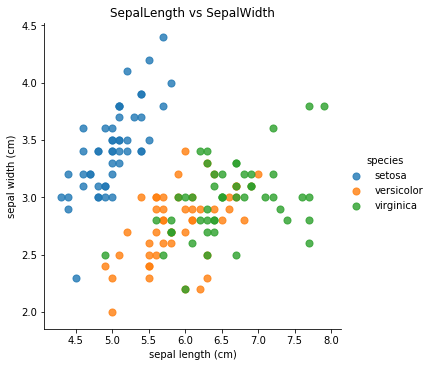

In [81]:
sns.lmplot('sepal length (cm)', 'sepal width (cm)',
           data=df, fit_reg=False, hue='species',
           scatter_kws={"marker":"D", "s":50})
plt.title('SepalLength vs SepalWidth')

In [82]:
print(df["species"].unique())

[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]


In [96]:
sy = df.species.cat.rename_categories(
    {'setosa':'0', 'versicolor':'1','virginica':'2'})
df['species'] = sy
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [97]:
df = df.iloc[np.random.permutation(len(df))]
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
86,6.7,3.1,4.7,1.5,1
88,5.6,3.0,4.1,1.3,1
26,5.0,3.4,1.6,0.4,0
80,5.5,2.4,3.8,1.1,1
30,4.8,3.1,1.6,0.2,0


In [104]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [105]:
print(X[:3])
print(y[:3])

[[6.7 3.1 4.7 1.5]
 [5.6 3.  4.1 1.3]
 [5.  3.4 1.6 0.4]]
[1, 1, 0]
Categories (3, object): [0, 1, 2]


In [0]:
X_normalized = normalize(X, axis=0)

In [0]:
total_length = len(df)
train_length = int(0.8*total_length)
test_length = int(0.2*total_length)

In [0]:
X_train = X_normalized[:train_length]
X_test = X_normalized[train_length:]
y_train = y[:train_length]
y_test = y[train_length:]

In [111]:
print(y_train.shape[0])
print(y_test.shape[0])

120
30


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [114]:
y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)
#one-hot-encoding
print(y_train.shape)

(120, 3)


In [115]:
model=Sequential()
model.add(Dense(1000, input_dim=4, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=20, epochs=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 120 samples, validate on 30 samples
Epoch 1/10





120/120 [==============================] - 1s 10ms/step - loss: 1.0837 - acc: 0.4917 - val_loss: 1.0649 - val_acc: 0.2667
Epoch 2/10
120/120 [==============================] - 0s 799us/step - loss: 1.0202 - acc: 0.6083 - val_loss: 0.9832 - val_acc: 0.5667
Epoch 3/10
120/120 [==============================] - 0s 786us/step - loss: 0.8928 - acc: 0.6917 - val_loss: 0.8376 - val_acc: 0.5667
Epoch 4/10
120/120 [==============================] - 0s 799us/step - loss: 0.6880 - acc: 0.6917 - val_loss: 0.6554 - val_acc: 0.5667
Epoch 5/10
120/120 [==============================] - 0s 780us/step - loss: 0.4920 - acc: 0.7333 - val_loss: 0.4521 - val_acc: 0.9000
Epoch 6/10
120/120 [==============================] - 0s 802us/step - loss: 0.3430 - acc: 0.9083 - val_loss: 0.2997 - val_acc: 1.0000
Epoch 7/10
120/120 [==============================

In [0]:
prediction = model.predict(X_test)
length = len(prediction)
y_label = np.argmax(y_test, axis=1)
predict_label = np.argmax(prediction, axis=1)

In [121]:
print(y_label)
print(predict_label)

[1 2 1 1 1 1 2 0 1 0 2 0 1 0 2 0 2 1 1 1 1 0 0 1 0 2 0 2 1 2]
[1 1 1 1 1 1 2 0 1 0 2 0 1 0 2 0 2 1 1 1 1 0 0 1 0 2 0 2 1 2]


In [120]:
accuracy = np.sum(y_label == predict_label)/length
print(accuracy)

0.9666666666666667
